In [ ]:
import pandas as pd

In [ ]:
df= pd.read_csv("data.csv")
df.head(5)

In [ ]:
df.describe()

In [ ]:
df.isnull().sum()

In [ ]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           11914 non-null  object 
 1   Model          11914 non-null  object 
 2   Year           11914 non-null  int64  
 3   HP             11845 non-null  float64
 4   Cylinders      11884 non-null  float64
 5   Transmission   11914 non-null  object 
 6   Driven_Wheels  11914 non-null  object 
 7   highway MPG    11914 non-null  int64  
 8   city mpg       11914 non-null  int64  
 9   MSRP           11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [ ]:
df = df.rename(columns={'Engine HP': 'HP', 'Transmission Type': 'Transmission', 'Engine Cylinders': 'Cylinders'})

In [14]:
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [18]:
duplicates_df = df[df.duplicated()]
duplicates_df.shape

(989, 10)

In [19]:
duplicates_df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,highway MPG,city mpg,MSRP
14,BMW,1 Series,2013,230.0,6.0,MANUAL,rear wheel drive,28,19,31500
18,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
20,Audi,100,1992,172.0,6.0,MANUAL,front wheel drive,24,17,2000
24,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000
25,Audi,100,1993,172.0,6.0,MANUAL,front wheel drive,24,17,2000


In [21]:
df = df.drop_duplicates()
df.shape

(10925, 10)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10925 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           10925 non-null  object 
 1   Model          10925 non-null  object 
 2   Year           10925 non-null  int64  
 3   HP             10856 non-null  float64
 4   Cylinders      10895 non-null  float64
 5   Transmission   10925 non-null  object 
 6   Driven_Wheels  10925 non-null  object 
 7   highway MPG    10925 non-null  int64  
 8   city mpg       10925 non-null  int64  
 9   MSRP           10925 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 938.9+ KB


In [28]:
df.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Driven_Wheels     0
highway MPG       0
city mpg          0
MSRP              0
dtype: int64

In [29]:
df = df.dropna()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10827 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           10827 non-null  object 
 1   Model          10827 non-null  object 
 2   Year           10827 non-null  int64  
 3   HP             10827 non-null  float64
 4   Cylinders      10827 non-null  float64
 5   Transmission   10827 non-null  object 
 6   Driven_Wheels  10827 non-null  object 
 7   highway MPG    10827 non-null  int64  
 8   city mpg       10827 non-null  int64  
 9   MSRP           10827 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.4+ KB


In [31]:
df.isnull().sum()

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Driven_Wheels    0
highway MPG      0
city mpg         0
MSRP             0
dtype: int64

In [32]:
import seaborn as sns

<Axes: xlabel='HP'>

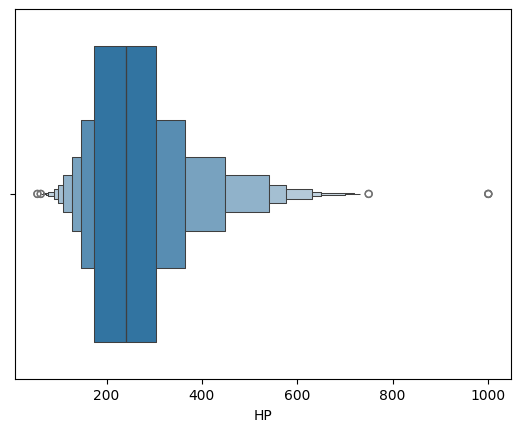

In [42]:
sns.boxenplot(x = df['HP'])

<Axes: xlabel='MSRP'>

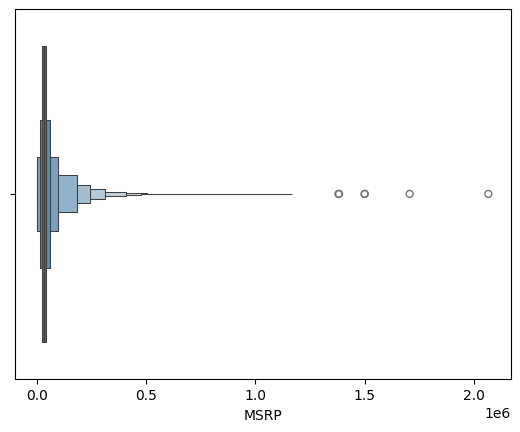

In [43]:
sns.boxenplot(x = df['MSRP'])

<Axes: xlabel='Cylinders'>

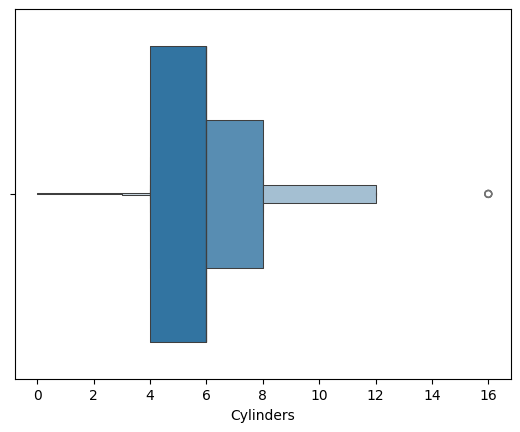

In [44]:
sns.boxenplot(x = df['Cylinders'])

In [46]:
Q1 = df.quantile(.25, numeric_only='True')
Q3 = df.quantile(.75, numeric_only='True')
IQR = Q3 - Q1
print(IQR)

Year               9.0
HP               130.0
Cylinders          2.0
highway MPG        8.0
city mpg           6.0
MSRP           21327.5
dtype: float64


In [62]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'make')

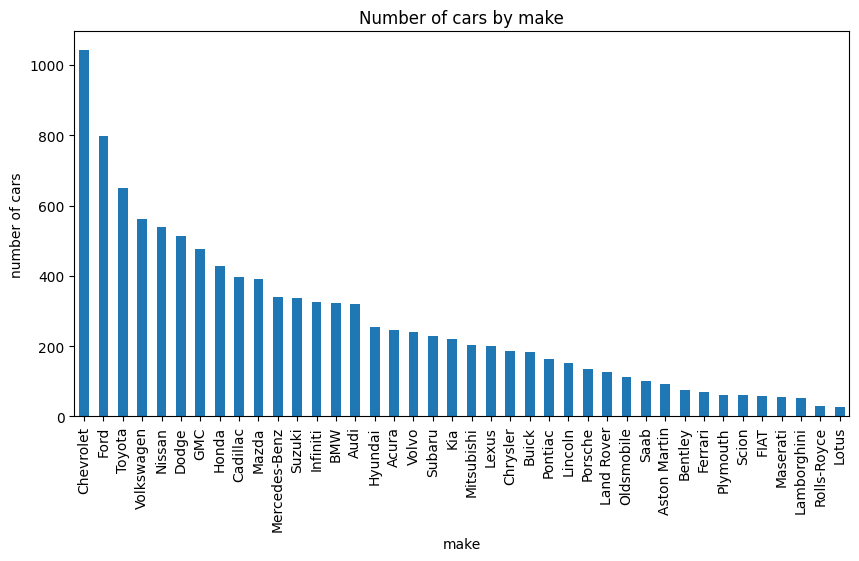

In [63]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10, 5))
plt.title('Number of cars by make')
plt.ylabel('number of cars')
plt.xlabel('make')

<Axes: >

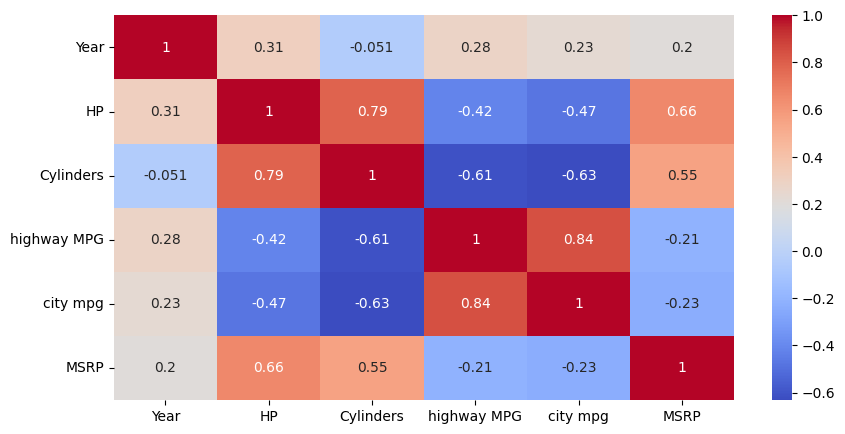

In [67]:
numberic_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10,5))
c = numberic_df.corr()
sns.heatmap(c, cmap="coolwarm", annot=True)